In [1]:
#Mpresley 5/2/23
# the cycle of twelve
#1. sovle by maximum likelihood
#2. compare solutions
#3. plot the fits

In [340]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize
from scipy.special import logsumexp
import matplotlib.pyplot as plt


In [4]:
# Solve the maximum likelihood
# Moriarity used an anaylitical method to solve for the best fit of the given data 
# We want to used the maximum likelihood
#A. Download the data set
#B. Create the objective function NLL
#C. Run the optimizer
#D. Return the optimized parameters and show them

In [207]:
#A. Download the data, use 
oscillation_data = pd.read_table('w08-data.tbl',
                            delim_whitespace=True, # Whether it is whitespace delimited
                            skiprows=1, # Number of rows to skip
                            header = 1, # Row that has the header (None since we are going to provide it ourselves)
                            names = ['gene_name','4hr+-20','4hr+-2','8hr+-20','8hr+-5','16hr+-5','16hr+-20','24hr+-2','24hr+-20'], # Column names
                            index_col=0 # Set the row names using the first column
                           )

In [209]:
oscillation_data

,4hr+-20,4hr+-2,8hr+-20,8hr+-5,16hr+-5,16hr+-20,24hr+-2,24hr+-20
gene_name,,,,,,,,
anise,82.16,61.52,56.65,53.24,19.64,53.96,41.79,48.77
kiwi,32.62,22.48,39.71,51.13,74.26,96.05,20.09,24.04
carrot,60.73,57.91,75.95,64.55,42.33,36.01,31.41,24.17
grape,45.68,48.98,58.39,73.43,42.46,40.32,18.61,8.86
tangerine,96.16,63.74,47.03,51.52,19.26,36.95,57.78,53.23
melon,16.05,58.09,14.91,40.52,44.77,44.89,69.97,80.42
clementine,59.43,33.61,15.48,18.16,65.60,38.55,60.69,32.44
spinach,57.77,32.15,44.04,37.15,70.32,67.11,38.75,39.04
beet,65.97,45.26,28.64,16.28,37.18,20.54,69.18,89.60


In [663]:
#A.i. set sigmas and time numpy arrays.
# this will be used later for the object function
sigmas = np.array([20,2,20,5,5,20,2,20])
ts = np.array([4,4,8,8,16,16,24,24])

In [178]:
'''
#    y_pred = b + a sin(2π𝑤(ts+phi))
def nll(params, ts, ys, sigmas):
    a,b, phi = params
    y_pred = b + a * sin(2π𝑤(ts+phi))
    ll_terms = stats.norm.logpdf(ys - y_pred, loc=0, scale=sigmas)
    return -ll_terms.sum()
    '''

SyntaxError: invalid syntax (1823682073.py, line 4)

In [305]:
#B. Create the objective function
def nll(params, ts, ys, sigmas):
    b,a,phi = params
    freq = np.pi/24
    y_pred = b + a * np.sin(2*freq*(ts+phi))
    ll_terms = stats.norm.logpdf(ys - y_pred, loc=0, scale=sigmas)
    return -ll_terms.sum()
    

In [212]:
#B.i test nll
#a,b,phi
test_params = 26.08,46.91,21.33
#B.ii create ys from data
ys = np.array(oscillation_data.loc['carrot'])
nll(test_params,ts,ys,sigmas)


26.45641650399478

In [242]:
#B.i test nll
#a,b,phi
#test_params = 18,42,9.36
test_params = -27,48,94.15
#B.ii create ys from data
ys = np.array(oscillation_data.loc['clementine'])
nll(test_params,ts,ys,sigmas)


26.88247974111913

In [215]:
#based on using Moriaty data, the nll seems to be working (assuming Moriarity data is somewhat close)

guess = 25,40,20
#test for gene 'carrot' example
minimization_data = optimize.minimize(nll, guess, (ts, ys, sigmas))

In [216]:
a = minimization_data.x[0]
b = minimization_data.x[1]
phi = minimization_data.x[2]

In [220]:
a,b,phi

(-27.59602684274584, 48.01805379769302, 94.15713726285044)

In [184]:
optim_params = a,b,phi
nll(optim_params,ts,ys,sigmas)
#this result looks good

25.731400509634852

In [682]:
#for i in oscillation_data.iloc:
#    print(i.index)

In [186]:
oscillation_data.index[0]
ysGene = []

for gene in oscillation_data.iloc:
    print(oscillation_data.index[i])
    
    

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [722]:
#C Run optimizer
guess = 25,40,20
Optim_params = {}
i = 0
#apply the bounds to avoid getting negative numbers
bnds = ((None, None), (0, None),(None,None))
for gene in oscillation_data.iloc:
    ysGene = np.array([gene])
    opt_data = optimize.minimize(nll, guess, (ts, ysGene, sigmas),bounds=bnds)
    #opt_data = optimize.minimize(nll, guess, (ts, ysGene, sigmas))
    a = opt_data.x[0] 
    Optim_params[oscillation_data.index[i]] = [opt_data.x[0],opt_data.x[1],opt_data.x[2]]
    i += 1
    
    

In [723]:
#Optim_df = pd.DataFrame(Optim_params,columns = ['a','b','phi'])
Optim_df = pd.DataFrame(Optim_params,index=['b','a','phi'])

In [724]:
Optim_df = Optim_df.T

In [725]:
Optim_params

{'anise': [39.99224825979707, 22.415082797895572, 24.448708787480705],
 'kiwi': [48.840372775794656, 31.842560576466177, 16.264649200784444],
 'carrot': [47.576546635746766, 24.231286907144792, 21.414573143141986],
 'grape': [44.90181963929628, 32.33375808707258, 20.420180376582763],
 'tangerine': [42.75634769208433, 22.14774427306454, 26.777180540098925],
 'melon': [51.26472303904757, 19.09949155124974, 30.68728637054227],
 'clementine': [48.01806845594409, 27.596015677887262, 34.15713996321269],
 'spinach': [49.72592884195367, 18.401027689941653, 14.265083090494935],
 'beet': [40.85219016884185, 30.614586091979724, 31.420647719311855],
 'huckleberry': [45.98602087711411, 21.57749683358966, 131.46567982023257],
 'lentil': [53.06396123536001, 17.324943277259884, 27.480711903666656],
 'cauliflower': [39.12337661486114, 27.480724591568155, 17.945455365835656]}

In [726]:
Optim_df

,b,a,phi
anise,39.992248,22.415083,24.448709
kiwi,48.840373,31.842561,16.264649
carrot,47.576547,24.231287,21.414573
grape,44.901820,32.333758,20.420180
tangerine,42.756348,22.147744,26.777181
melon,51.264723,19.099492,30.687286
clementine,48.018068,27.596016,34.157140
spinach,49.725929,18.401028,14.265083
beet,40.852190,30.614586,31.420648
huckleberry,45.986021,21.577497,131.465680


In [699]:
moriarty_data

,b,a,phi
geneename,,,
anise,48.56,15.67,0.61
kiwi,52.70,33.46,15.58
carrot,46.91,26.08,21.33
grape,41.68,30.17,20.21
tangerine,47.54,22.96,2.60
melon,46.48,27.44,8.16
clementine,42.09,18.32,9.36
spinach,51.88,14.39,14.26
beet,43.13,35.66,6.48


In [700]:
#Reset the index for to help compare it with Moriarity 
Optim_df = Optim_df.reindex(['carrot','grape','cauliflower','kiwi','spinach','huckleberry','clementine','melon','beet','tangerine','lentil','anise'])

In [261]:
ll_score = []
ys

array([59.43, 33.61, 15.48, 18.16, 65.6 , 38.55, 60.69, 32.44])

In [262]:
ll_score = np.array([])
for row in Optim_df.iloc:
    params = row[1],row[0],row[2]
    nll(params,ts,ys,sigmas)
    print(list(row)[])

SyntaxError: invalid syntax (1931891848.py, line 5)

In [276]:
#Optim_df.loc['anise'][0]
for gene in Optim_params.keys():
    


IndentationError: expected an indented block (2493390779.py, line 3)

In [309]:
#for gene in Optim_df.index:
 #print(gene)
#ys1 = oscillation_data.loc["anise"]
def ScoreParams(df_params,data,ts,sigmas):
    ll_score = []
    for gene in data.index:
        ygene = np.array(data.loc[gene])
        params = df_params.loc[gene]
        ll_score.append(nll(params,ts,ygene,sigmas))
    return sum(ll_score)

In [727]:
ScoreParams(Optim_df,oscillation_data,ts,sigmas)

311.72964272089575

In [329]:
#Now let's get Moriarity Data
#A. Download the data, use 
moriarty_data = pd.read_table('moriarty-data.tbl',
                            delim_whitespace=True, # Whether it is whitespace delimited
                            skiprows=0, # Number of rows to skip
                            header = 1, # Row that has the header (None since we are going to provide it ourselves)
                            names = ['geneename','b','a','phi'], # Column names
                            index_col=0 # Set the row names using the first column
                           )

In [330]:
moriarty_data
#Optim_df

,b,a,phi
geneename,,,
anise,48.56,15.67,0.61
kiwi,52.70,33.46,15.58
carrot,46.91,26.08,21.33
grape,41.68,30.17,20.21
tangerine,47.54,22.96,2.60
melon,46.48,27.44,8.16
clementine,42.09,18.32,9.36
spinach,51.88,14.39,14.26
beet,43.13,35.66,6.48


In [695]:
ScoreParams(moriarty_data,oscillation_data,ts,sigmas)

445.8636478253692

In [333]:
#Since 311 is less 445, it looks like our method is better
# so your is 445 - 311 is 134 better. Give a scale 
# your is approx 311/445 - 1 = .30 or about 30% relatively better

In [334]:
#3. Plot the fits,
#B. Create the objective function
'''
def nll(params, ts, ys, sigmas):
    b,a,phi = params
    freq = np.pi/24
    y_pred = b + a * np.sin(2*freq*(ts+phi))
    ll_terms = stats.norm.logpdf(ys - y_pred, loc=0, scale=sigmas)
    return -ll_terms.sum()
    '''

'\ndef nll(params, ts, ys, sigmas):\n    b,a,phi = params\n    freq = np.pi/24\n    y_pred = b + a * np.sin(2*freq*(ts+phi))\n    ll_terms = stats.norm.logpdf(ys - y_pred, loc=0, scale=sigmas)\n    return -ll_terms.sum()\n    '

In [338]:
def plot_harmonize(params,ts):
    b,a,phi = params
    freq = np.pi/24
    y_pred = b + a * np.sin(2*freq*(ts+phi))
    return y_pred
    
plot_params = 39.43,35.30,18.72
plot_harmonize(plot_params,ts)

array([27.82100737, 27.82100737, 62.49574732, 62.49574732, 51.03899263,
       51.03899263,  4.75526005,  4.75526005])

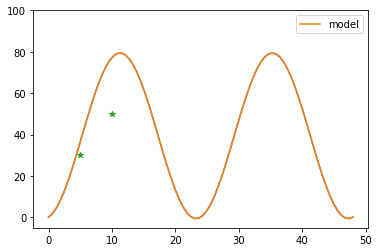

In [571]:
x = np.linspace(0,48,80)
#np.arange(24)
b,a,phi = plot_params
xTs =  np.linspace(0,48,80)
freq = np.pi/24
a = 40
y_pred = b + a * np.sin(2*freq*(xTs+phi))
y_pred_2 = b + a * np.cos(2*freq*(xTs+phi))
ax = plt.plot(x,y_pred)
xtest = [5,10,15,20,25,30]
ytest = [5,10,15,20,25,30]
plt.plot(x,y_pred, label='model')
#plt.plot(xtest,ytest, label = "test")
plt.plot([5,10],[30,50],"*")

plt.ylim([-5,100])
plt.legend()
#plt.plot(30,10)


In [612]:
testa = ['4','2','8','5','1','6']
testa[::2]
testa[1::2]
x_data = np.array([4,5,8,9,16,17,24,25])
twenty_idx = np.array([0,2,5,7])
x_data[twenty_idx]


array([ 4,  8, 17, 25])

In [728]:
oscillation_data

,4hr+-20,4hr+-2,8hr+-20,8hr+-5,16hr+-5,16hr+-20,24hr+-2,24hr+-20
gene_name,,,,,,,,
anise,82.16,61.52,56.65,53.24,19.64,53.96,41.79,48.77
kiwi,32.62,22.48,39.71,51.13,74.26,96.05,20.09,24.04
carrot,60.73,57.91,75.95,64.55,42.33,36.01,31.41,24.17
grape,45.68,48.98,58.39,73.43,42.46,40.32,18.61,8.86
tangerine,96.16,63.74,47.03,51.52,19.26,36.95,57.78,53.23
melon,16.05,58.09,14.91,40.52,44.77,44.89,69.97,80.42
clementine,59.43,33.61,15.48,18.16,65.60,38.55,60.69,32.44
spinach,57.77,32.15,44.04,37.15,70.32,67.11,38.75,39.04
beet,65.97,45.26,28.64,16.28,37.18,20.54,69.18,89.60


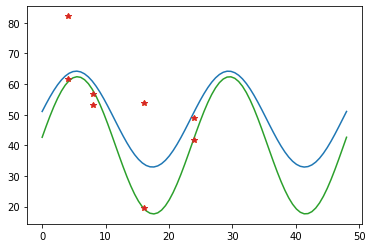

In [614]:
#print(Optim_df.sort_values("phi"))
#print(moriarty_data.sort_values("phi"))
x = np.linspace(0,48,80)
params = moriarty_data.loc['anise']
b,a,phi = params
plt.clf()
y_pred = b + a * np.sin(2*freq*(x+phi))
ax = plt.plot(x,y_pred,label="Data")
y_data = np.array(oscillation_data.loc['anise'])
#print(oscillation_data.loc['anise'])
twenty_x = [4,8,16,24]
twenty_idx = [0,2,5,7]
twenty_y = y_data[twenty_idx]
x_data = [4,4,8,8,16,16,24,24]
plt.plot(x_data,y_data,'*',label='test')


params = Optim_df.loc['anise']
b,a,phi = params
y_pred = b + a * np.sin(2*freq*(x+phi))
ax = plt.plot(x,y_pred)
plt.plot(x_data,y_data,'*')


In [769]:
#MPrelsey 5/8/23, create function that will graph and compautre the sin parametes of two models
def GraphCompareModels(model1,model2,data,gene):
    #create x domain
    x = np.linspace(0,48,80)
    #graph freq information
    freq = np.pi/24
    
    # create model 1 and graph it
    #grab param 1 
    params1 = model1.loc[gene]
    # set parameters from param1
    b1,a1,phi1 = params1
    y_pred1 = b1 + a1 * np.sin(2*freq*(x+phi1))
    ax = plt.plot(x,y_pred1,label="Moriarty's Model")
    
    #Now create model two
    params2 = model2.loc[gene]
    # set parameters from param1
    b2,a2,phi2 = params2
    y_pred2 = b2 + a2 * np.sin(2*freq*(x+phi2))
    ax = plt.plot(x,y_pred2,label="Our Model")
    
    #Now plot data (create domain
    y_data = np.array(data.loc[gene])
    
    #Plot the twenty standard deviation data
    twenty_x = [4,8,16,24]
    twenty_idx = [0,2,5,7]
    twenty_y = y_data[twenty_idx]
    plt.plot(twenty_x,twenty_y,'^',label="+=20")
    
    #Plot the two standard deviation data
    two_x = [4,24]
    two_idx = [1,6]
    two_y = y_data[two_idx]
    plt.plot(two_x,two_y,'o',label="+=2")
    
    #Plot the two standard deviation data
    five_x = [8,16]
    five_idx = [3,4]
    five_y = y_data[five_idx]
    plt.plot(five_x,five_y,'*',label="+=5")

    plt.xlabel("Hours")
    plt.ylabel("Gene expression")
    plt.title(gene)
    plt.legend()

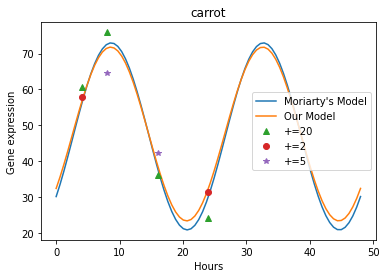

In [770]:
#b
#np.linspace(0,24,100)
#oscillation_data.index
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'carrot')


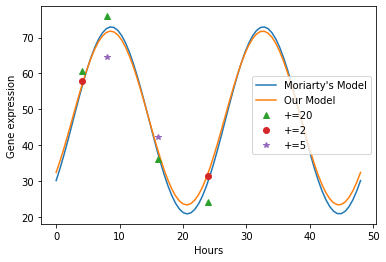

In [729]:
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'carrot')

In [731]:
#Step 3 i to compare the data in a four panel thing
index = oscillation_data.index
print(index)


Index(['anise', 'kiwi', 'carrot', 'grape', 'tangerine', 'melon', 'clementine',
       'spinach', 'beet', 'huckleberry', 'lentil', 'cauliflower'],
      dtype='object', name='gene_name')


In [774]:
figure, ax = plt.subplots(nrows=3, ncols=4,figsize=(16,9))
#plt.figure(figsize=(50,50))
#plt.figure(figsize=(10,6))
#ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = ax.flatten()

ax[1, 2].plot(1,2) = GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'anise')

#ax[0, 1] = GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'carrot')
#ax1 = GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'anise')
#ax2 = GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'carrot')

plt.show()

SyntaxError: cannot assign to function call (3661378447.py, line 6)

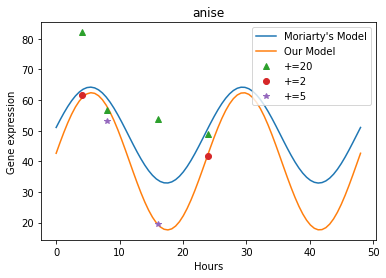

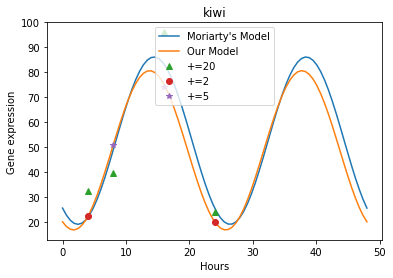

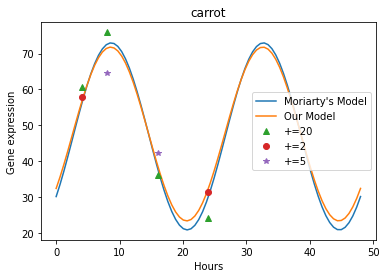

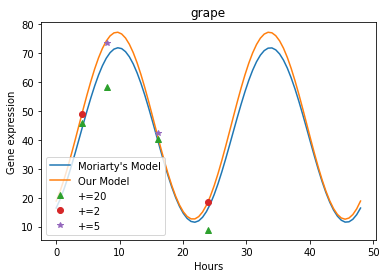

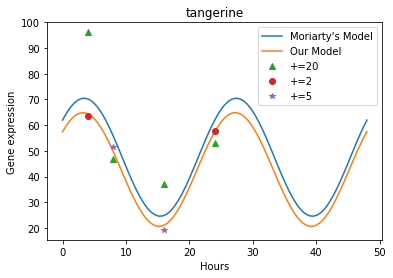

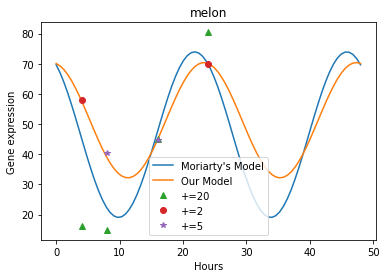

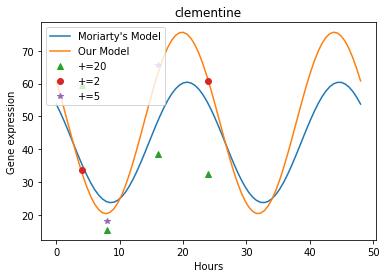

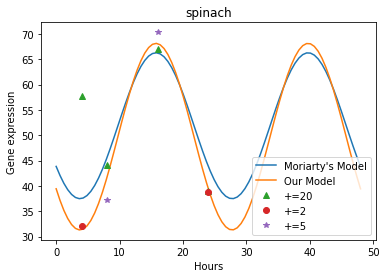

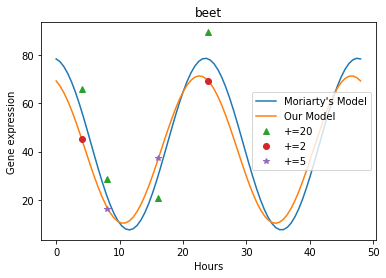

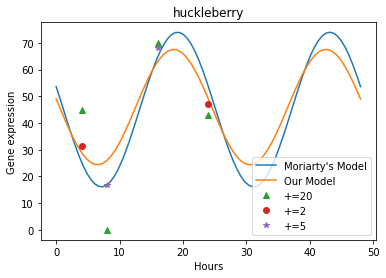

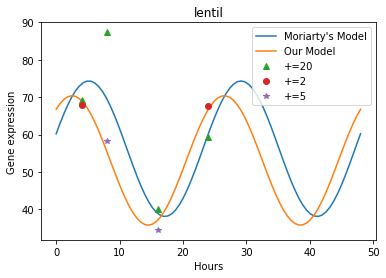

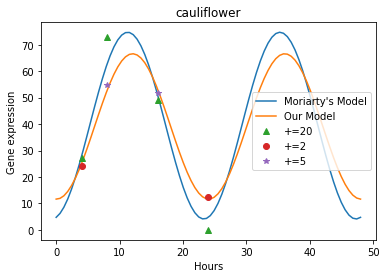

In [780]:
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'anise')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'kiwi')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'carrot')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'grape')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'tangerine')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'melon')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'clementine')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'spinach')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'beet')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'huckleberry')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'lentil')
plt.show()
GraphCompareModels(moriarty_data,Optim_df,oscillation_data,'cauliflower')
plt.show()


In [783]:
#The highest phi values according to the Optim
Optim_df.sort_values('phi')

,b,a,phi
spinach,49.725929,18.401028,14.265083
kiwi,48.840373,31.842561,16.264649
cauliflower,39.123377,27.480725,17.945455
grape,44.901820,32.333758,20.420180
carrot,47.576547,24.231287,21.414573
anise,39.992248,22.415083,24.448709
tangerine,42.756348,22.147744,26.777181
lentil,53.063961,17.324943,27.480712
melon,51.264723,19.099492,30.687286
beet,40.852190,30.614586,31.420648


In [786]:
#The highest phi values according to the Moriarty data
moriarty_data.sort_values('phi')

,b,a,phi
geneename,,,
anise,48.56,15.67,0.61
lentil,56.20,18.14,0.85
tangerine,47.54,22.96,2.60
beet,43.13,35.66,6.48
melon,46.48,27.44,8.16
clementine,42.09,18.32,9.36
huckleberry,45.06,28.94,10.85
spinach,51.88,14.39,14.26
kiwi,52.70,33.46,15.58
